In [9]:
import streamlit as st

# Data processing
import pandas as pd
import geopandas as gpd

# Data visualisation
import seaborn as sns
import pydeck as pdk

import functions as fn

In [2]:
bus_slider = st.slider(
    'Bus Stops',
    min_value=1,
    max_value=10,
    value=5,
    help='How important is having this amenities to you'
)

hawker_slider = st.slider(
    'Hawker Centers',
    min_value=1,
    max_value=10,
    value=5,
    help='How important is having this amenities to you'
)

malls_slider = st.slider(
    'Malls',
    min_value=1,
    max_value=10,
    value=5,
    help='How important is having this amenities to you'
)

mrt_slider = st.slider(
    'MRT Stations',
    min_value=1,
    max_value=10,
    value=5,
    help='How important is having this amenities to you'
)

schools_slider = st.slider(
    'Schools',
    min_value=1,
    max_value=10,
    value=5,
    help='How important is having this amenities to you'
)

supermarket_slider = st.slider(
    'Supermarkets',
    min_value=1,
    max_value=10,
    value=5,
    help='How important is having this amenities to you'
)

travel_slider = st.slider(
    'Travel Time to City Centre',
    min_value=10,
    max_value=80,
    value=40,
    step=10,
    help='What is the maximum travel time you are willing to be from the city centre'
)

resale_slider = st.slider(
    'Resale Range',
    min_value=90000,
    max_value=710000,
    value=[150000, 450000],
    step=10000,
    help='How important is having this amenities to you'
)


2022-11-05 15:00:42.892 
  command:

    streamlit run /Users/joshuavargas/opt/miniforge3/envs/env_ARM_geostack/lib/python3.9/site-packages/ipykernel_launcher.py [ARGUMENTS]


In [3]:
slider_inputs = [bus_slider, hawker_slider, malls_slider, mrt_slider, schools_slider, supermarket_slider]

In [4]:
slider_inputs

[5, 5, 5, 5, 5, 5]

In [5]:
result_gdf = fn.our_algorithm(resale_slider, fn.get_tuples(slider_inputs), travel_slider)

In [6]:
result_gdf

,index,OBJECTID,SUBZONE_NO,SUBZONE_N,SUBZONE_C,CA_IND,PLN_AREA_N,PLN_AREA_C,REGION_N,REGION_C,...,SHAPE_Leng,SHAPE_Area,busstop_no,mrtsg_no,schools_no,malls_no,supermarke,hawkercent,geometry,SCORE
61,277,278,4,BEDOK NORTH,BDSZ04,N,BEDOK,BD,EAST REGION,ER,...,8413.277055,3.202920e+06,56.0,1.0,3.0,5.0,31.0,5.0,"POLYGON ((41191.002 34698.575, 41164.711 34676...",505.0
44,209,210,5,FRANKEL,BDSZ05,N,BEDOK,BD,EAST REGION,ER,...,8757.186693,4.296775e+06,80.0,0.0,1.0,0.0,16.0,0.0,"POLYGON ((39164.831 32938.576, 39165.556 32934...",485.0
2,7,8,4,ALJUNIED,GLSZ04,N,GEYLANG,GL,CENTRAL REGION,CR,...,7049.124464,2.945506e+06,45.0,3.0,2.0,0.0,26.0,4.0,"POLYGON ((34277.234 32322.636, 34282.432 32306...",400.0
1,6,7,5,GEYLANG EAST,GLSZ05,N,GEYLANG,GL,CENTRAL REGION,CR,...,7027.740482,2.580431e+06,35.0,3.0,2.0,4.0,29.0,3.0,"POLYGON ((35987.194 33319.391, 36001.551 33245...",380.0
31,151,152,4,SERANGOON CENTRAL,SGSZ04,N,SERANGOON,SG,NORTH-EAST REGION,NER,...,9137.391554,3.140777e+06,56.0,3.0,1.0,1.0,15.0,0.0,"POLYGON ((32986.926 37324.426, 32968.297 37310...",380.0
29,136,137,1,HOUGANG CENTRAL,HGSZ01,N,HOUGANG,HG,NORTH-EAST REGION,NER,...,6868.798253,2.291220e+06,51.0,1.0,3.0,2.0,17.0,0.0,"POLYGON ((35948.803 40264.817, 35951.927 40239...",370.0
26,120,121,4,SIMEI,TMSZ04,N,TAMPINES,TM,EAST REGION,ER,...,7402.560780,2.778636e+06,52.0,2.0,1.0,1.0,6.0,0.0,"POLYGON ((42534.776 36876.305, 42528.098 36854...",310.0
63,279,280,6,BEDOK SOUTH,BDSZ06,N,BEDOK,BD,EAST REGION,ER,...,7812.691833,2.997458e+06,37.0,1.0,3.0,0.0,8.0,3.0,"POLYGON ((41191.669 34697.586, 41202.645 34681...",260.0
64,281,282,1,KAKI BUKIT,BDSZ01,N,BEDOK,BD,EAST REGION,ER,...,8153.838704,2.819363e+06,37.0,2.0,1.0,0.0,11.0,1.0,"POLYGON ((37595.840 34959.383, 37493.949 34909...",260.0
58,270,271,8,YIO CHU KANG,AMSZ08,N,ANG MO KIO,AM,NORTH-EAST REGION,NER,...,7665.910209,3.617085e+06,43.0,1.0,1.0,0.0,5.0,1.0,"POLYGON ((30759.279 41446.512, 30763.459 41376...",255.0


In [16]:
a = fn.clean_algorithm_results(result_gdf)

In [17]:
def clean_algorithm_results(result_database):
    #given the database of our top 10 results
    #return the desired outputs in a dataframe
    return pd.DataFrame(result_database.iloc[:,[3,6,8,16,17,18,19,20,21,23]])

In [18]:
a = clean_algorithm_results(result_gdf)

In [19]:
a

,SUBZONE_N,PLN_AREA_N,REGION_N,busstop_no,mrtsg_no,schools_no,malls_no,supermarke,hawkercent,SCORE
61,BEDOK NORTH,BEDOK,EAST REGION,56.0,1.0,3.0,5.0,31.0,5.0,505.0
44,FRANKEL,BEDOK,EAST REGION,80.0,0.0,1.0,0.0,16.0,0.0,485.0
2,ALJUNIED,GEYLANG,CENTRAL REGION,45.0,3.0,2.0,0.0,26.0,4.0,400.0
1,GEYLANG EAST,GEYLANG,CENTRAL REGION,35.0,3.0,2.0,4.0,29.0,3.0,380.0
31,SERANGOON CENTRAL,SERANGOON,NORTH-EAST REGION,56.0,3.0,1.0,1.0,15.0,0.0,380.0
29,HOUGANG CENTRAL,HOUGANG,NORTH-EAST REGION,51.0,1.0,3.0,2.0,17.0,0.0,370.0
26,SIMEI,TAMPINES,EAST REGION,52.0,2.0,1.0,1.0,6.0,0.0,310.0
63,BEDOK SOUTH,BEDOK,EAST REGION,37.0,1.0,3.0,0.0,8.0,3.0,260.0
64,KAKI BUKIT,BEDOK,EAST REGION,37.0,2.0,1.0,0.0,11.0,1.0,260.0
58,YIO CHU KANG,ANG MO KIO,NORTH-EAST REGION,43.0,1.0,1.0,0.0,5.0,1.0,255.0


<AxesSubplot:>

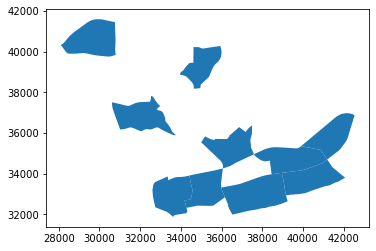

In [22]:
gpd.GeoDataFrame(result_gdf).plot()